## 1. Read the Dataset

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('OLYMP-FINAL.csv', sep=';')
data.head()

,S.no.,First Name,Sport Name,Event Name,Certification Number,State Name,Position,KID.,Category
0,1,Eklavya jagal,Ice Skating,Speed Skating Short Trach 300mtr (Under 17),KIWG2024/W/A/1,Uttar Pradesh,FIRST,SSAA015M07,Boys
1,2,Aarav Aniruddha Patwardhan,Ice Skating,Speed Skating Short Trach 300mtr (Under 17),KIWG2024/W/A/2,Maharashtra,SECOND,SSAA000M09,Boys
2,3,ADVAY NOOPUR KOTHARI,Ice Skating,Speed Skating Short Trach 300mtr (Under 17),KIWG2024/W/A/3,Maharashtra,THIRD,SSAA001M09,Boys
3,4,AKASH ARADHYA,Ice Skating,Speed Skating Short Trach 300mtr (Above 17),KIWG2024/W/A/4,Karnataka,FIRST,SSAA000M93,Boys
4,5,Suyog Sanjay Tapkir,Ice Skating,Speed Skating Short Trach 300mtr (Above 17),KIWG2024/W/A/5,Maharashtra,SECOND,SSAA001M97,Boys


## 2. Exploratory Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   S.no.                 296 non-null    int64 
 1   First Name            296 non-null    object
 2   Sport Name            296 non-null    object
 3   Event Name            296 non-null    object
 4   Certification Number  296 non-null    object
 5   State Name            296 non-null    object
 6   Position              296 non-null    object
 7   KID.                  296 non-null    object
 8   Category              296 non-null    object
dtypes: int64(1), object(8)
memory usage: 20.9+ KB
None
            S.no.
count  296.000000
mean   148.500000
std     85.592056
min      1.000000
25%     74.750000
50%    148.500000
75%    222.250000
max    296.000000


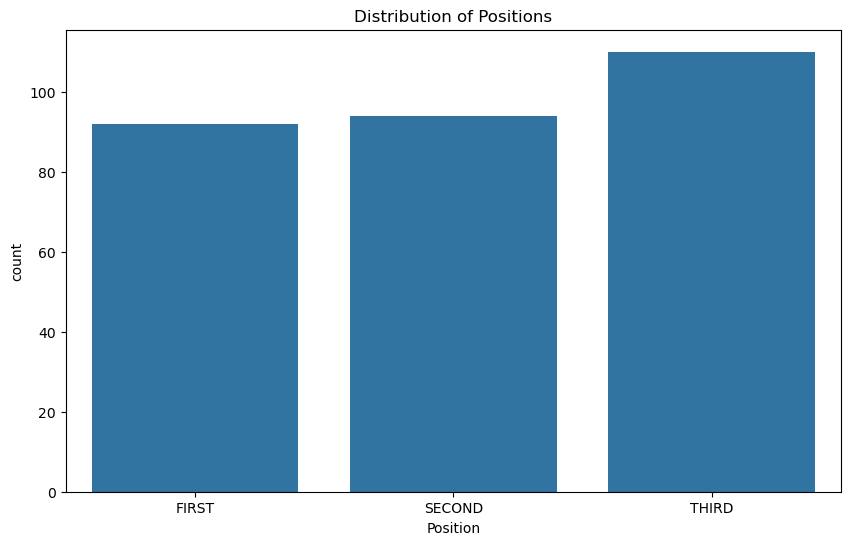

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic info and statistics
print(data.info())
print(data.describe())

# Countplot for positions
plt.figure(figsize=(10,6))
sns.countplot(x='Position', data=data)
plt.title('Distribution of Positions')
plt.show()

## 3. Preprocess the data

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

position_mapping = {
    'FIRST': 1,
    'SECOND': 2,
    'THIRD': 3
}

X = data[['Sport Name', 'Event Name', 'State Name', 'Category']]
y = data['Position'].map(position_mapping)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Sport Name', 'Event Name', 'State Name', 'Category'])
    ]
)

## 4. Split into Train and Test

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Build the model

In [5]:
# Pipeline is a sequence of steps that automates data preprocessing and model training in a consistent way
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Define different models
models = {
    'Random Forest': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'SVM': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC(probability=True, kernel='linear'))
    ]),
    'KNN': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier(n_neighbors=5))
    ]),
    'Logistic Regression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ])
}

## 6. Train the models

Model accuracies:
Random Forest: 75.00%
SVM: 70.00%
KNN: 70.00%
Logistic Regression: 75.00%
Best model selected: RandomForestClassifier with accuracy: 75.00%


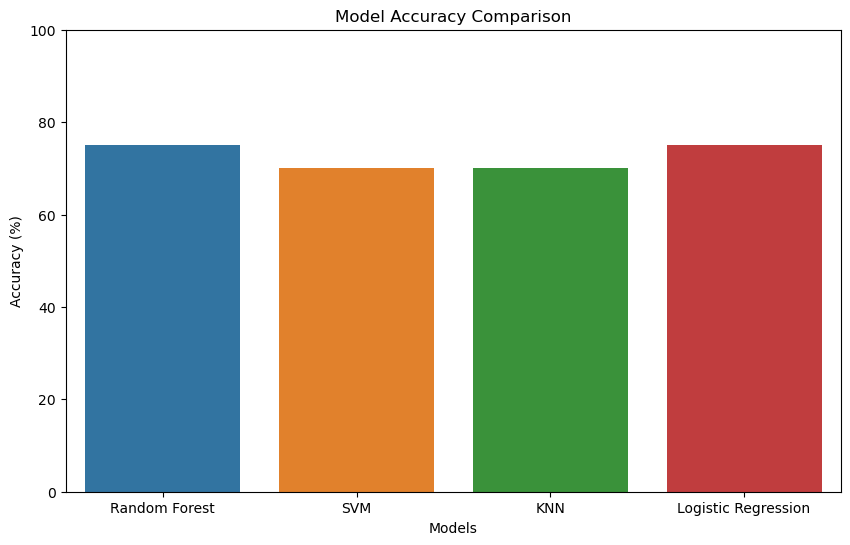

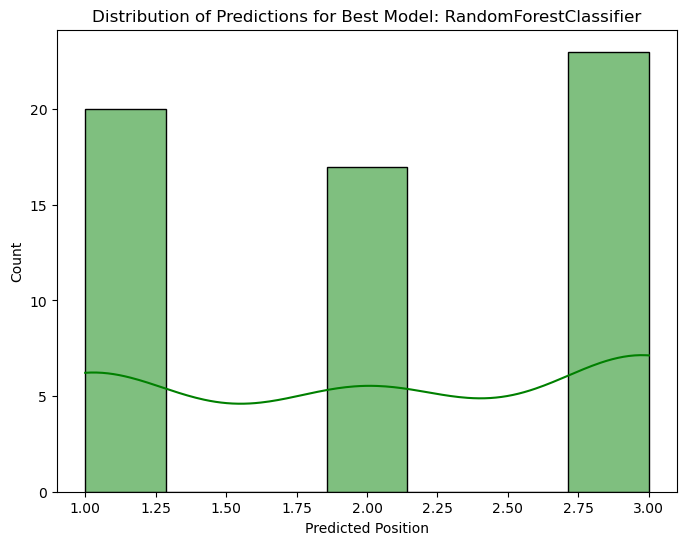

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

best_model = None
best_accuracy = 0
results = {}

# Training models and storing accuracy
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy * 100
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Print model accuracies
print("Model accuracies:")
for name, accuracy in results.items():
    print(f'{name}: {accuracy:.2f}%')

# Print best model selected
print(f'Best model selected: {best_model.named_steps["classifier"].__class__.__name__} with accuracy: {best_accuracy * 100:.2f}%')

# Plotting accuracy diagram for each model
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), hue=list(results.keys()), legend=False)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()

# Accuracy distribution of the best model
y_pred_best = best_model.predict(X_test)
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_best, kde=True, color='green')      # Kernel Density Estimate
plt.title(f'Distribution of Predictions for Best Model: {best_model.named_steps["classifier"].__class__.__name__}')
plt.xlabel('Predicted Position')
plt.show()

## 7. Test and Evaluate Models

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)
class_report = classification_report(y_test, y_pred_best)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Precision: Correct positive predictions among all predicted positives.
# Recall: Correct positive predictions among all actual positives.
# F1-Score: mean of precision and recall
# Support: The number of actual occurrences of each class in the dataset.

Confusion Matrix:
 [[15  1  0]
 [ 2 11  4]
 [ 3  5 19]]
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.94      0.83        16
           2       0.65      0.65      0.65        17
           3       0.83      0.70      0.76        27

    accuracy                           0.75        60
   macro avg       0.74      0.76      0.75        60
weighted avg       0.76      0.75      0.75        60



## 8. Use the Model for Predicting the future data

In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv('/Users/sharatrk/Desktop/SEM~2/OLYMP PREDICTION/OLYMP-FINAL.csv', sep=';')
position_mapping = {'FIRST': 1, 'SECOND': 2, 'THIRD': 3}

X = data[['Sport Name', 'Event Name', 'State Name', 'Category']]
y = data['Position'].map(position_mapping)

preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), ['Sport Name', 'Event Name', 'State Name', 'Category'])]
)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

def get_player_details(player_name, event_name):
    player_data = data[(data['First Name'] == player_name) & (data['Event Name'] == event_name)]
    if player_data.empty:
        return 'Please enter a valid player name or event name and try again', None
    features = player_data[['Sport Name', 'Event Name', 'State Name', 'Category']]
    features_transformed = pipeline.named_steps['preprocessor'].transform(features)
    predicted_position_scaled = pipeline.named_steps['classifier'].predict(features_transformed)[0]
    winning_percentage = max(0, min(100, 100 * (10 - predicted_position_scaled) / 9))
    return {
        'First Name': player_name,
        'Sport Name': player_data['Sport Name'].values[0],
        'Event Name': event_name,
        'State Name': player_data['State Name'].values[0],
        'Category': player_data['Category'].values[0],
        'Position': predicted_position_scaled
    }, winning_percentage

player_name_input = input('Enter player name: ')
event_name_input = input('Enter event name: ')
details, winning_percentage = get_player_details(player_name_input, event_name_input)

if isinstance(details, dict):
    print(f"Details for {player_name_input} in the event {event_name_input} are:")
    for key, value in details.items():
        print(f"{key}: {value}")
    print(f'Winning percentage: {winning_percentage:.2f}%')
else:
    print(details)

Details for Eklavya jagal in the event Speed Skating Short Trach 300mtr (Under 17) are:
First Name: Eklavya jagal
Sport Name: Ice Skating
Event Name: Speed Skating Short Trach 300mtr (Under 17)
State Name: Uttar Pradesh
Category: Boys
Position: 1
Winning percentage: 100.00%
